In [118]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt

## Tanimoto index

In [29]:
# function to return the silimarity index of two bit vectors
def tanimoto_index(bit_vector1, bit_vector2):
    intersect = [bit1 and bit2 for bit1, bit2 in zip(bit_vector1, bit_vector2)]
    union = [bit1 or bit2 for bit1, bit2 in zip(bit_vector1, bit_vector2)]
    index = sum(intersect) / sum(union)
    # index = round(index, 2)
    return index

In [17]:
tanimoto_index([1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 1, 0, 0, 1, 1, 1, 0, 1])

0.33

In [36]:
# upload the vasopressin dataset
data = pd.read_csv("data/chembl_Vasopressin_V1a_receptor_KI.csv", delimiter = ";")

smiles = data["Smiles"]
smiles.fillna("", inplace = True)
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
data["molecule"] = molecules

In [51]:
# add MACCS keys to the dataframe
data["MACCSkey"] = data["molecule"].apply(MACCSkeys.GenMACCSKeys)
# add Morgan fingerprints to the dataframe
data["morgan_fingerprint"] = data["molecule"].apply(AllChem.GetMorganFingerprintAsBitVect, args = (2, ), nBits = 1024)

In [25]:
data.loc[0, "MACCSkey"].ToBitString()

'00000000000000000001000000000000000000000000000000000000010000100010000000110000000101000000110010001100010010111101010011100111110000000100010111101110111011111111110'

In [30]:
tanimoto_index(data.loc[0, "MACCSkey"], data.loc[55, "MACCSkey"])

0.4393939393939394

In [31]:
DataStructs.TanimotoSimilarity(data.loc[0, "MACCSkey"], data.loc[55, "MACCSkey"]) # it works! :)

0.4393939393939394

## SMARTS pattern substructure search

In [46]:
substructures_smarts = [Chem.MolFromSmarts("a[A,!R]a"),
                    Chem.MolFromSmarts("a[A,!R][A,!R]a"),
                  Chem.MolFromSmarts("a[A,!R][A,!R][A,!R]a")]

In [47]:
for molecule in data["molecule"]:
    print([molecule.HasSubstructMatch(substruct) for substruct in substructures_smarts])

[False, False, False]
[False, False, False]
[True, True, True]
[False, False, False]
[False, False, False]
[False, False, False]
[False, True, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, True, False]
[False, True, False]
[False, False, False]
[False, True, False]
[True, False, False]
[False, False, False]
[False, True, True]
[False, True, True]
[False, False, False]
[False, False, False]
[False, False, False]
[True, False, True]
[True, False, True]
[True, False, False]
[False, True, False]
[False, False, False]
[False, False, False]
[False, True, False]
[True, False, True]
[False, True, False]
[True, False, False]
[False, False, False]
[False, False, False]
[False, True, False]
[False, True, False]
[False, True, False]
[False, False, False]
[False, False, False]
[False, False, True]
[False, False, False]
[False, False, False]
[False, False, False]
[True, True, True]
[False, True, False]
[False, False, False]
[False, True, False]
[False, False, False

[False, False, True]
[False, False, False]
[False, False, False]
[False, True, False]
[False, False, False]
[False, False, False]
[False, True, False]
[False, False, False]
[False, False, False]
[True, False, False]
[True, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[True, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[True, False, False]
[False, False, False]
[False, False, True]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[True, True, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[True, False, False]
[False, False, True]
[False, True, False]
[False, False, False]
[

[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, True]
[False, False, False]
[False, False, False]
[False, False, False]
[False, True, False]
[False, True, False]
[False, False, True]
[False, False, False]
[False, False, False]
[False, False, False]
[True, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[True, True, False]
[True, True, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, True]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False

In [61]:
# smiles pattern –> exfp fingerprint -> similarity search -> order by molecule similarity with pattern

In [71]:
# function to return copy of dataframe ordered by the similarity value
def order_dataset_by_similarity_with_pattern(smiles_pattern, dataset):
    pattern = Chem.MolFromSmiles(smiles_pattern)
    morgan_fingerprint_pattern = AllChem.GetMorganFingerprintAsBitVect(pattern, 2, nBits = 1024)
    similarity_list = [tanimoto_index(morgan_fingerprint_pattern, mol) for mol in dataset["morgan_fingerprint"]]
    dataset_copy = dataset.copy(deep=True)
    dataset_copy["pattern_similarity"] = similarity_list
    dataset_copy.sort_values(by = ["pattern_similarity"], ascending=False, inplace=True)
    return dataset_copy

<AxesSubplot:>

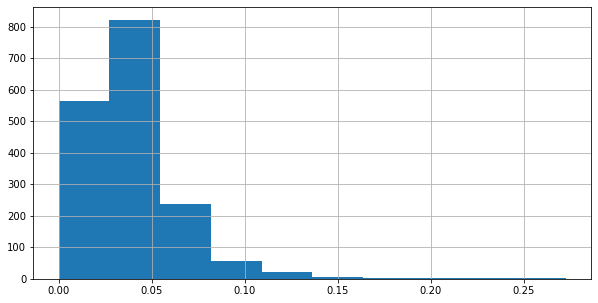

In [79]:
order_dataset_by_similarity_with_pattern("c1ccccc1", data)["pattern_similarity"].hist(figsize=(10, 5))

In [80]:
vasopressin_wiki_smiles = "c1ccc(cc1)C[C@H]2C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@H](C(=O)N2)Cc3ccc(cc3)O)N)C(=O)N4CCC[C@H]4C(=O)N[C@@H](CCCN=C(N)N)C(=O)NCC(=O)N)CC(=O)N)CCC(=O)N"

In [91]:
order_dataset_by_similarity_with_pattern(vasopressin_wiki_smiles, data)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,molecule,MACCSkey,morgan_fingerprint,pattern_similarity
537,CHEMBL562961,NaN,0,1084.25,None,None,"1, AVP",NC(=O)CC[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@...,Ki,'=',...,1,Scientific Literature,J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f96fe40>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1.000000
1320,CHEMBL562961,NaN,0,1084.25,None,None,"1, AVP",NC(=O)CC[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@...,Ki,'=',...,1,Scientific Literature,J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f17c8f0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1.000000
928,CHEMBL373742,VASOPRESSIN,4,1084.25,None,None,AVP,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,Ki,'=',...,1,Scientific Literature,J. Med. Chem.,2007.0,CHEMBL3308072,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f977b70>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.858586
531,CHEMBL373742,VASOPRESSIN,4,1084.25,None,None,AVP,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,Ki,'=',...,1,Scientific Literature,J. Med. Chem.,2007.0,CHEMBL3307648,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f96fc60>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.858586
713,CHEMBL373742,VASOPRESSIN,4,1084.25,None,None,AVP,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,Ki,'=',...,1,Scientific Literature,J. Med. Chem.,2007.0,CHEMBL3307648,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f9736c0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.858586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,CHEMBL1909074,POLYVINYLPYRROLIDONE,0,None,None,None,POLYVINYLPYRROLIDONE,,Ki,NaN,...,15,DrugMatrix,NaN,NaN,CHEMBL3307715,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f182d50>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
1539,CHEMBL1909069,NaN,0,None,None,None,MC 288769,,Ki,NaN,...,15,DrugMatrix,NaN,NaN,CHEMBL3307715,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f180ee0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
1317,CHEMBL1386,TRANSPLATIN,3,300.05,None,None,TRANS-PLATINUM(II)DIAMMINE DICHLORIDE,,Ki,NaN,...,15,DrugMatrix,NaN,NaN,CHEMBL3307715,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f17c800>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
1675,CHEMBL1909075,NaN,0,None,None,None,"QUINOLONE, CHEMI-LINZ ; CYANAMID",,Ki,NaN,...,15,DrugMatrix,NaN,NaN,CHEMBL3307715,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f183a80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000


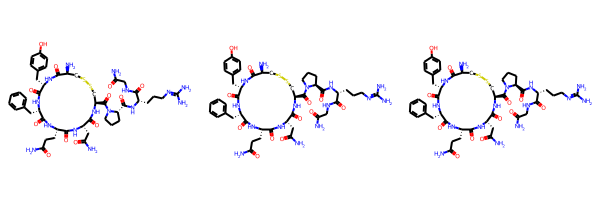

In [97]:
Draw.MolsToGridImage([Chem.MolFromSmiles(vasopressin_wiki_smiles), data.loc[537, "molecule"], data.loc[1320, "molecule"]])

In [82]:
# analogue
terlipressin_wiki_smiles = "O=C(N)CNC(=O)[C@@H](NC(=O)[C@H]4N(C(=O)[C@H]1NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)CNC(=O)CNC(=O)CN)CSSC1)Cc2ccc(O)cc2)Cc3ccccc3)CCC(=O)N)CC(=O)N)CCC4)CCCCN"

<AxesSubplot:>

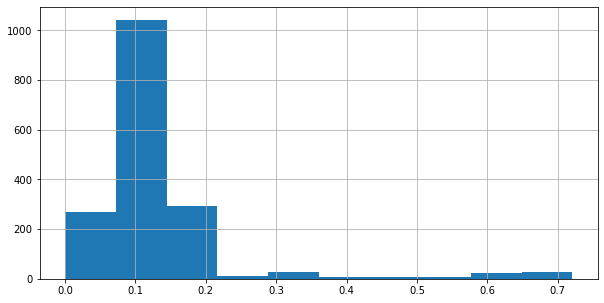

In [109]:
order_dataset_by_similarity_with_pattern(terlipressin_wiki_smiles, data)["pattern_similarity"].hist(figsize=(10, 5))

In [110]:
tarlipressin_similarity_res = order_dataset_by_similarity_with_pattern(terlipressin_wiki_smiles, data)
hits_better_than_70_percent = tarlipressin_similarity_res.loc[tarlipressin_similarity_res["pattern_similarity"] > 0.7, "molecule"].values.tolist()

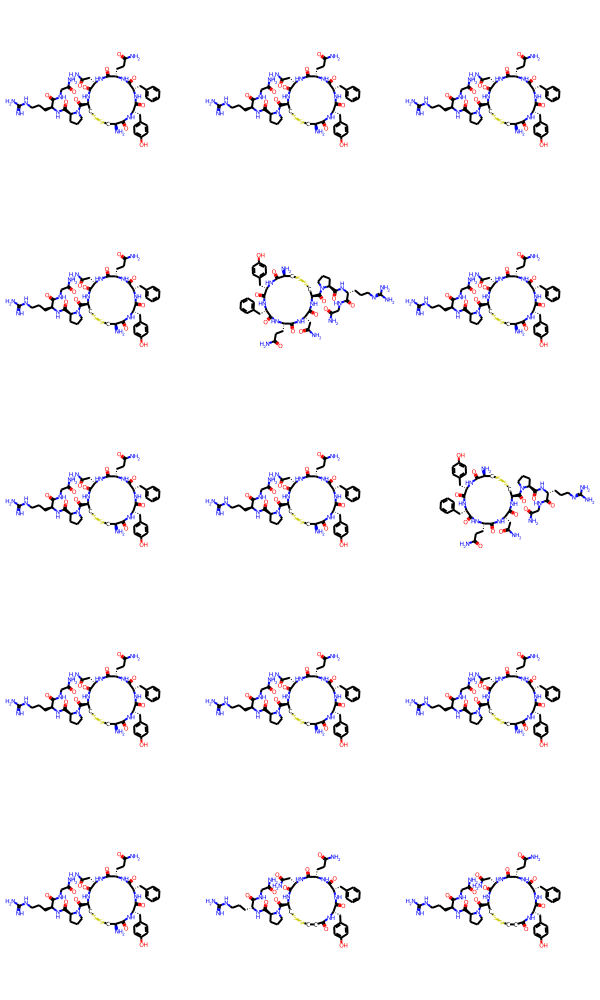

In [111]:
Draw.MolsToGridImage(hits_better_than_70_percent)

In [112]:
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,molecule,MACCSkey,morgan_fingerprint
0,CHEMBL1085301,NaN,0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911c2d4da0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL1084008,NaN,0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911d332da0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL4173250,NaN,0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...,Ki,'=',...,CHEMBL4138154,1,Scientific Literature,Eur J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911bb90210>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL382301,ATOSIBAN,4,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...,Ki,'=',...,CHEMBL1142309,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2008.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f13c3a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,CHEMBL1085299,NaN,0,377.53,1,5.71,12k,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f13c620>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,CHEMBL3342789,NaN,0,334.79,0,2.72,2a,O=S(=O)(Nc1ccnn1-c1ccccn1)c1ccc(Cl)cc1,Ki,'>',...,CHEMBL4138097,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f184670>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1713,CHEMBL4126100,NaN,0,1139.37,None,None,dOT(L8R)ortho,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,Ki,'=',...,CHEMBL4118114,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f1846c0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1714,CHEMBL4129142,NaN,0,1096.34,None,None,dOTmeta,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,Ki,'=',...,CHEMBL4118114,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f184710>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1715,CHEMBL419667,RELCOVAPTAN,2,620.51,1,3.30,"12, SR 49059",COc1ccc(S(=O)(=O)N2c3ccc(Cl)cc3[C@](O)(c3ccccc...,Ki,'=',...,CHEMBL4270673,1,Scientific Literature,J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7f911f184760>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Tanimito similarity distance matrix

In [ ]:
similarity_matrix = pd.DataFrame(index = data["Molecule ChEMBL ID"], columns = data["Molecule ChEMBL ID"])

for row1 in data.index:
    for row2 in data.index[row1 + 1: ]:
         name1, fingerprint1 = data.loc[row1, ["Molecule ChEMBL ID", "morgan_fingerprint"]]
         name2, fingerprint2 = data.loc[row2, ["Molecule ChEMBL ID", "morgan_fingerprint"]]

         similarity_matrix.loc[name1, name2] = tanimoto_index(fingerprint1, fingerprint2)

similarity_matrix = similarity_matrix.add(res.T, fill_value = 0)  # res is upper triangular

In [115]:
similarity_matrix

Molecule ChEMBL ID,CHEMBL1085301,CHEMBL1084008,CHEMBL4173250,CHEMBL382301,CHEMBL1085299,CHEMBL315232,CHEMBL432043,CHEMBL143304,CHEMBL590097,CHEMBL592733,...,CHEMBL3416772,CHEMBL3416774,CHEMBL3416774,CHEMBL4289837,CHEMBL363910,CHEMBL3342789,CHEMBL4126100,CHEMBL4129142,CHEMBL419667,CHEMBL4127791
Molecule ChEMBL ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL1085301,NaN,0.701493,0.165049,0.121429,0.666667,0.152174,0.183486,0.208333,0.14,0.14,...,0.150538,0.155556,0.155556,0.162602,0.15625,0.103448,0.115646,0.119718,0.201923,0.123188
CHEMBL1084008,NaN,NaN,0.165049,0.129496,0.666667,0.164835,0.183486,0.208333,0.163265,0.163265,...,0.163043,0.168539,0.168539,0.162602,0.15625,0.090909,0.123288,0.135714,0.201923,0.139706
CHEMBL4173250,NaN,NaN,NaN,0.116438,0.132653,0.178947,0.153846,0.150943,0.176471,0.176471,...,0.153061,0.170213,0.170213,0.137405,0.231579,0.108696,0.156463,0.145833,0.159292,0.158273
CHEMBL382301,NaN,NaN,NaN,1.0,0.129771,0.128788,0.131579,0.177778,0.113475,0.113475,...,0.119403,0.105263,0.105263,0.248322,0.092199,0.094488,0.617188,0.590551,0.2,0.609756
CHEMBL1085299,NaN,NaN,NaN,0.129771,NaN,0.182927,0.176471,0.188889,0.141304,0.141304,...,0.152941,0.17284,0.17284,0.155172,0.159091,0.074074,0.107143,0.119403,0.195876,0.114504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3342789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHEMBL4126100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHEMBL4129142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


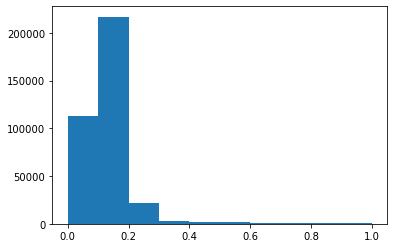

In [121]:
plt.hist(similarity_matrix.to_numpy().flatten())
plt.show()